In [34]:
from concurrent.futures import ProcessPoolExecutor
from google.colab import drive
from tqdm import tqdm

import pandas as pd

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data_counts = pd.DataFrame({ 'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                             '01~06': [0] * 12,
                             '07~12': [0] * 12,
                             '13~18': [0] * 12,
                             '19~24': [0] * 12 })

# data_counts = pd.DataFrame({ 'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
#                              '00~05': [0] * 12,
#                              '06~11': [0] * 12,
#                              '12~17': [0] * 12,
#                              '18~23': [0] * 12 })

data_counts

,Month,00~05,06~11,12~17,18~23
0,Jan,0,0,0,0
1,Feb,0,0,0,0
2,Mar,0,0,0,0
3,Apr,0,0,0,0
4,May,0,0,0,0
5,Jun,0,0,0,0
6,Jul,0,0,0,0
7,Aug,0,0,0,0
8,Sep,0,0,0,0
9,Oct,0,0,0,0


In [37]:
def process_data_and_count_time_intervals(month):
    file_path = f"/content/drive/Shareddrives/TextMining_Disk1/LAB_Folder/Final_project/datasets/商品資料-2022_{str(month).zfill(2)}.xlsx"
    output_file_path = f"/content/drive/Shareddrives/TextMining_Disk1/LAB_Folder/Final_project/datasets/selected_data_{str(month).zfill(2)}.xlsx"

    # 讀取每個月份的檔案
    data = pd.read_excel(file_path)

    # 轉換時間格式
    data['time'] = pd.to_datetime(data['time'])

    # 新增 '時段' 欄位
    conditions = [
        (data['time'].dt.hour.isin([1, 2, 3, 4, 5, 6])),
        (data['time'].dt.hour.isin([7, 8, 9, 10, 11, 12])),
        (data['time'].dt.hour.isin([13, 14, 15, 16, 17, 18])),
        (data['time'].dt.hour.isin([19, 20, 21, 22, 23, 0, 24]))
    ]

    # conditions = [
    #     (data['time'].dt.hour.isin([0, 1, 2, 3, 4, 5])),
    #     (data['time'].dt.hour.isin([6, 7, 8, 9, 10, 11])),
    #     (data['time'].dt.hour.isin([12, 13, 14, 15, 16, 17])),
    #     (data['time'].dt.hour.isin([18, 19, 20, 21, 22, 23]))
    # ]

    values = ['A', 'B', 'C', 'D']
    data['time_interval'] = pd.Series(pd.np.select(conditions, values))

    # 重新排列欄位順序
    selected_columns = ['time', 'time_interval', 'name', 'total_amount']
    data_selected = data[selected_columns]

    # 顯示時間段資料
    time_interval_counts = data_selected['time_interval'].value_counts()
    print(f"{month} 月的時段資料：\n{time_interval_counts}")
    data_counts['01~06'][month-1] = time_interval_counts['A']
    data_counts['07~12'][month-1] = time_interval_counts['B']
    data_counts['13~18'][month-1] = time_interval_counts['C']
    data_counts['19~24'][month-1] = time_interval_counts['D']

    # data_counts['00~05'][month-1] = time_interval_counts['A']
    # data_counts['06~11'][month-1] = time_interval_counts['B']
    # data_counts['12~17'][month-1] = time_interval_counts['C']
    # data_counts['18~23'][month-1] = time_interval_counts['D']

    # 將資料存成 Excel 檔案
    # data_selected.to_excel(output_file_path, index=False)

In [38]:
# 處理1到12月份的資料
for month in range(1, 13):
    process_data_and_count_time_intervals(month)

<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

1 月的時段資料：
C    45148
B    19029
A     8422
D     1822
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

2 月的時段資料：
C    6033
B    5456
A    3751
D     320
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

3 月的時段資料：
C    189817
B     88906
A     40767
D     10074
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

4 月的時段資料：
C    193265
B     87792
A     42338
D     11420
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

5 月的時段資料：
C    189019
B     88087
A     43629
D     12237
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

6 月的時段資料：
C    209094
B    101100
A     48750
D     13581
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

7 月的時段資料：
C    214086
B    104331
A     51787
D     14286
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

8 月的時段資料：
C    201642
B     98700
A     55345
D     15870
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

9 月的時段資料：
C    201332
B     98278
A     54784
D     14701
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

10 月的時段資料：
C    213963
B     98896
A     57130
D     17934
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

11 月的時段資料：
C    214572
B     98035
A     56890
D     17277
Name: time_interval, dtype: int64
12 月的時段資料：
C    191402
B     90309
A     53868
D     18426
Name: time_interval, dtype: int64


<ipython-input-37-847b4447e663>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['time_interval'] = pd.Series(pd.np.select(conditions, values))
<ipython-input-37-847b4447e663>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['00~05'][month-1] = time_interval_counts['A']
<ipython-input-37-847b4447e663>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_counts['06~11'][month-1] = time_interval_counts['B']
<ipython-input-37-847b4447e663>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [39]:
data_counts.to_csv('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/各月份時段商品數量表.csv', index=False)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

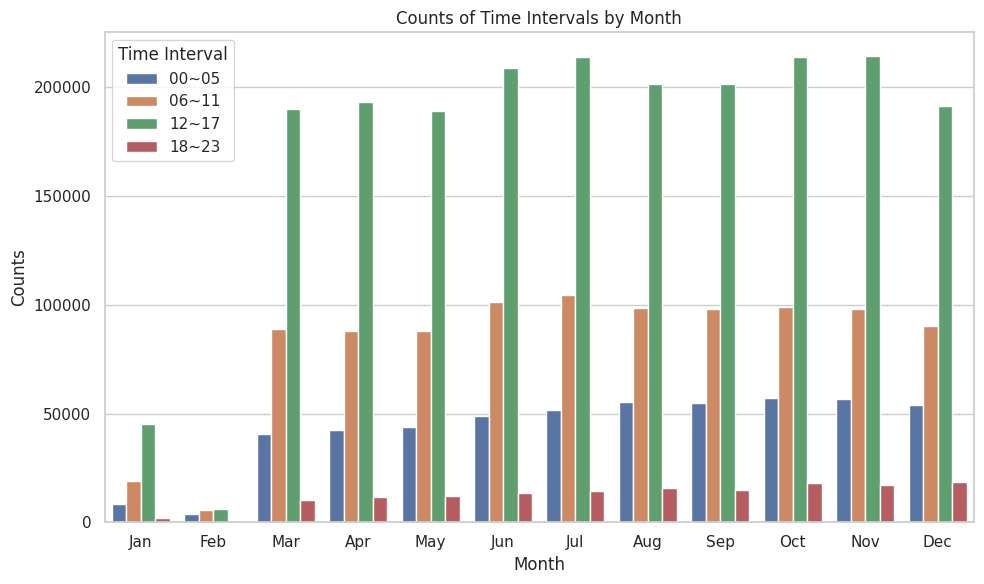

In [41]:
# 月份的設定，可以根據實際情況調整
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 製作 Seaborn 的長條圖
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 轉換資料框的形式以符合 Seaborn 的要求
data_counts_melted = data_counts.melt(id_vars='Month', var_name='Time Interval', value_name='Counts')

# 繪製長條圖
ax = sns.barplot(x='Month', y='Counts', hue='Time Interval', data=data_counts_melted)
ax.set_title('Counts of Time Intervals by Month')
ax.set_ylabel('Counts')
ax.set_xlabel('Month')

plt.legend(title='Time Interval')
plt.xticks(ticks=range(12), labels=months)  # 設置 x 軸的刻度為月份
plt.tight_layout()
plt.show()